In [5]:
from wbfm.utils.projects.finished_project_data import ProjectData
import plotly.express as px

# Step 1: using my project class

Note: you will need to update the path if you are not on the cluster. If you have /scratch mounted, this might work:

fname = "Z:/neurobiology/zimmer/fieseler/wbfm_projects/2022-11-27_spacer_7b_2per_agar/ZIM2165_Gcamp7b_worm1-2022_11_28/project_config.yaml"

In [2]:
fname = "/scratch/neurobiology/zimmer/fieseler/wbfm_projects/2022-11-27_spacer_7b_2per_agar/ZIM2165_Gcamp7b_worm1-2022_11_28/project_config.yaml"
project_data_gcamp = ProjectData.load_final_project_data_from_config(fname)

ConfigFile  : INFO     =======================================
Project data for directory:
/scratch/neurobiology/zimmer/fieseler/wbfm_projects/2022-11-27_spacer_7b_2per_agar/ZIM2165_Gcamp7b_worm1-2022_11_28 
With raw data in directory:
/scratch/neurobiology/zimmer/ulises/wbfm/20221127/data/ZIM2165_Gcamp7b_worm1/2022-11-27_15-14_ZIM2165_worm1_GC7b_Ch0-BH 
See self.worm_posture_class for information on behavioral parameters
Found the following data files:
============Raw Videos=================
red_data:                 True
green_data:               True
============Segmentation===============
raw_segmentation:         True
colored_segmentation:     True
============Tracking===================
tracklets:                True
final_tracks:             True
manual_tracking:          True
============Traces=====================
traces:                   True




# Step 2: get the traces as a pandas dataframe

In [3]:
# For convinience, use pre-calculated traces that are used in the paper
df_traces = project_data_gcamp.calc_default_traces(use_paper_options=True)

In [4]:
df_traces.head()

,DB01,neuron_002,neuron_003,neuron_004,neuron_005,RIVR,neuron_007,RIS,neuron_009,neuron_010,...,neuron_149,neuron_150,neuron_151,neuron_152,IL1LR,OLQDL,neuron_156,neuron_158,AVBR,ANTIcorR
0.000,0.209079,-0.093140,-0.023203,-0.104168,-0.045311,-0.011662,-0.059204,-0.033279,0.044801,0.026707,...,0.042903,-0.009969,0.025794,0.071767,0.083352,0.131583,-0.058234,-0.068406,0.006815,-0.123506
0.288,0.227101,-0.088075,-0.042881,-0.105428,-0.047404,-0.013886,-0.052511,-0.036457,0.044736,0.023184,...,0.040545,-0.010068,0.025276,0.070899,0.084029,0.126796,-0.061163,-0.073449,0.004662,-0.121916
0.576,0.217673,-0.080708,-0.038885,-0.110942,-0.047796,-0.019918,-0.036228,-0.043966,0.041594,0.015106,...,0.030378,-0.010696,0.022642,0.059547,0.090774,0.115602,-0.077065,-0.126416,-0.000314,-0.118579
0.864,0.194457,-0.067305,-0.040836,-0.118853,-0.047950,-0.028076,-0.018388,-0.051097,0.042381,0.002909,...,0.015845,-0.007697,0.014124,0.053926,0.097164,0.100439,-0.071063,-0.124383,-0.001836,-0.114855
1.152,0.162381,-0.058190,-0.040214,-0.129247,-0.046328,-0.037462,0.004127,-0.061176,0.040678,-0.013704,...,-0.000695,-0.002216,0.001942,0.052478,0.105174,0.081828,-0.059571,-0.122947,-0.002660,-0.115644


# Step 3: plot your favorite!

I like the plotly library, because it is interactive.

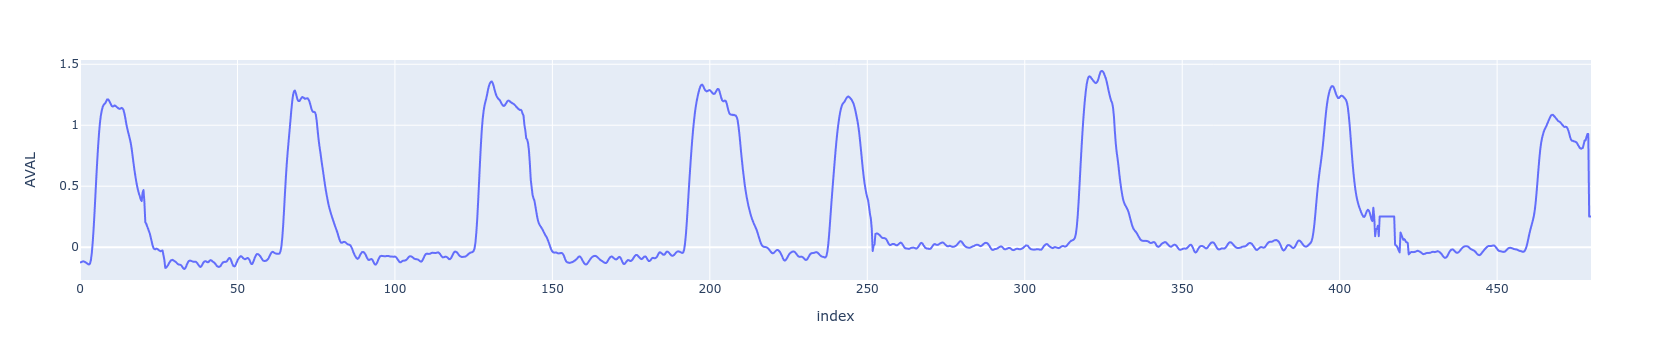

In [12]:
neuron_to_plot = 'AVAL'
fig = px.line(df_traces, y=neuron_to_plot)
fig.show()

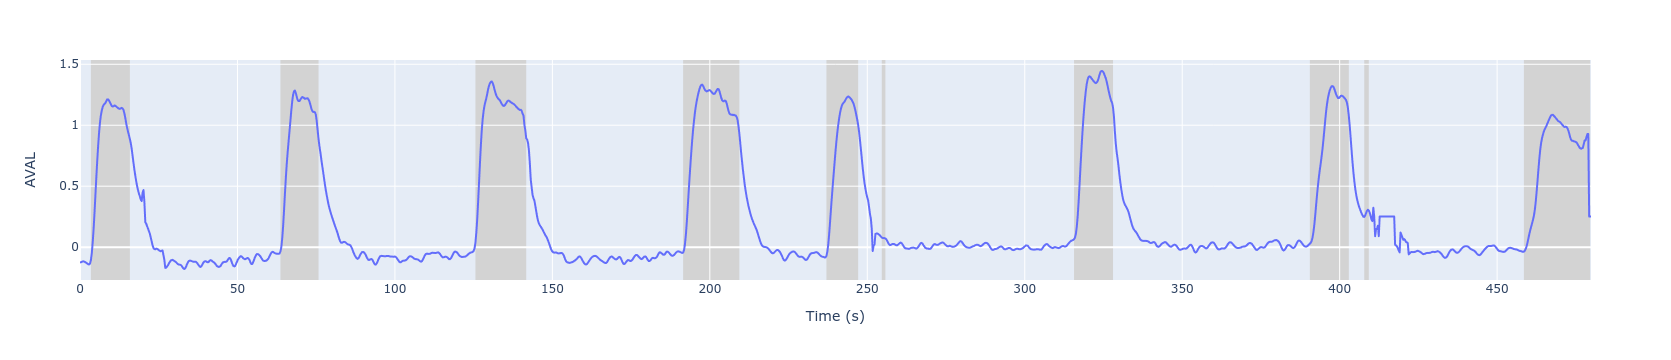

In [13]:
# Additional options for making it prettier
project_data_gcamp.use_physical_time = True
xlabel = project_data_gcamp.x_label_for_plots

fig.update_xaxes(title_text=xlabel)
project_data_gcamp.shade_axis_using_behavior(plotly_fig=fig)
fig.show()

# Step 3 (alternate): plot multiple neurons

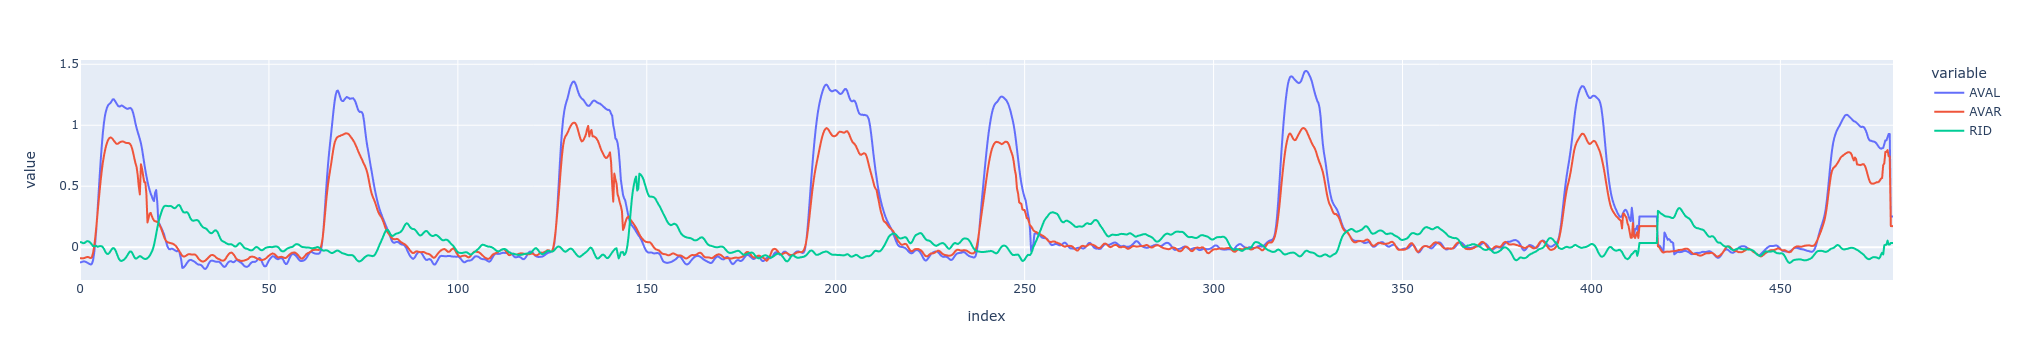

In [14]:
neuron_to_plot = ['AVAL', 'AVAR', 'RID']
fig = px.line(df_traces, y=neuron_to_plot)
fig.show()

# Step 4 (optional): save

In [9]:
fname = f"{neuron_to_plot}_trace.png"
fig.write_image(fname)